<img src="Images/Heading.png" width="1500" height = "600">

<img src="Images/Section1.png" width="1500" height = "300">

In [174]:
from nltk.stem import WordNetLemmatizer #Let's you lemmatize words
from nltk import pos_tag #Tags words with their parts of speech
from nltk.corpus import stopwords #Contains a list of stopwords
from nltk.corpus import wordnet #Contains a list of wordnet words
import pandas as pd #Dataframe
import numpy as np #Numpy
import matplotlib.pyplot as plt #Plotting
from sklearn.model_selection import train_test_split #Splits data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer #Counts the number of times a word appears in a document
from nltk.stem import PorterStemmer #Stems words
from sklearn.feature_extraction.text import TfidfVectorizer #Calculates the TF-IDF of a document
from sklearn.base import BaseEstimator, TransformerMixin #Base class for transformers
from sklearn.metrics import plot_confusion_matrix, classification_report #Used to plot confusion matrix and calculate accuracy
from sklearn.pipeline import make_pipeline #Used to create a pipeline
from sklearn.ensemble import RandomForestClassifier #Used to train a random forest classifier
from sklearn.model_selection import cross_val_score #Used to calculate cross validation accuracy
from sklearn.feature_extraction.text import TfidfVectorizer #Used to calculate the TF-IDF of a document
from sklearn.naive_bayes import MultinomialNB #Used to train a naive bayes classifier
from sklearn.linear_model import LogisticRegression #Used to train a logistic regression classifier
from imblearn.over_sampling import SMOTE #Used to oversample the minority class
from sklearn import svm #Used to train a support vector machine classifier
from sklearn.model_selection import GridSearchCV #Used to search for the best parameters for a model
from sklearn.decomposition import LatentDirichletAllocation #Used to train a LDA classifier

'''
---------------------------------------------------------------------------------------------------------------------
%pip install missingno
---------------------------------------------------------------------------------------------------------------------
'''
import missingno as msno #Used to plot missing values in a dataframe

'''
---------------------------------------------------------------------------------------------------------------------
****IMPORTANT****

TO INSALL THE WORDCLOUD LIBRARY, YOU MAY NEED TO RUN THE CODE BELOW IN A NEW CELL

%pip install https://github.com/sulunemre/word_cloud/releases/download/2/wordcloud-0.post1+gd8241b5-cp310-cp310-win_amd64.whl

JUST COPY AND PASTE THE ENTIRE LINE (INCLUDING THE % SIGN) INTO A NEW CELL AND RUN IT
---------------------------------------------------------------------------------------------------------------------
'''
from wordcloud import WordCloud #Used to generate a word cloud
'''
---------------------------------------------------------------------------------------------------------------------
Dataset: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
---------------------------------------------------------------------------------------------------------------------
'''

'\n---------------------------------------------------------------------------------------------------------------------\nDataset: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews\n---------------------------------------------------------------------------------------------------------------------\n'

In [175]:
'''
---------------------------------------------------------------------------------------------------------------------
The first step of the process is to import the pandas library so we can read the CSV file.
The file in question is a dataset concerning woman's clothing reviews
---------------------------------------------------------------------------------------------------------------------
'''

data = pd.read_csv('ClothingReviews.csv')
pd.set_option('display.max_columns', None) # Display all columns
data

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      <b>I love, love, love!</b> this jumpsuit. it's...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

In [176]:
'''
---------------------------------------------------------------------------------------------------------------------
We see two columns of interest here, we see the Review Text column which contains the review of the product,
And the Rating column which contains the rating of the product.
The rest of the columns are not of interest to us.
---------------------------------------------------------------------------------------------------------------------
From these two columns we can get text from the review text column and then the sentiment from the rating column.
---------------------------------------------------------------------------------------------------------------------
So let's take those columns first and create a new dataframe called reviewsData.
---------------------------------------------------------------------------------------------------------------------
'''

reviewsData = data[['Review Text', 'Rating']]
reviewsData


Review Text  Rating
0      Absolutely wonderful - silky and sexy and comf...       4
1      Love this dress!  it's sooo pretty.  i happene...       5
2      I had such high hopes for this dress and reall...       3
3      <b>I love, love, love!</b> this jumpsuit. it's...       5
4      This shirt is very flattering to all due to th...       5
...                                                  ...     ...
23481  I was very happy to snag this dress at such a ...       5
23482  It reminds me of maternity clothes. soft, stre...       3
23483  This fit well, but the top was very see throug...       3
23484  I bought this dress for a wedding i have this ...       3
23485  This dress in a lovely platinum is feminine an...       5

[23486 rows x 2 columns]

In [177]:
'''
---------------------------------------------------------------------------------------------------------------------
Let's check what we are working with.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [178]:
'''
---------------------------------------------------------------------------------------------------------------------
For the sake of consistency we will convert the object variables to string variables.
---------------------------------------------------------------------------------------------------------------------
'''
string_col = reviewsData.select_dtypes(include="object").columns
reviewsData[string_col] = reviewsData[string_col].astype("string")
reviewsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  string
 1   Rating       23486 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 367.1 KB


C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\1250257812.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

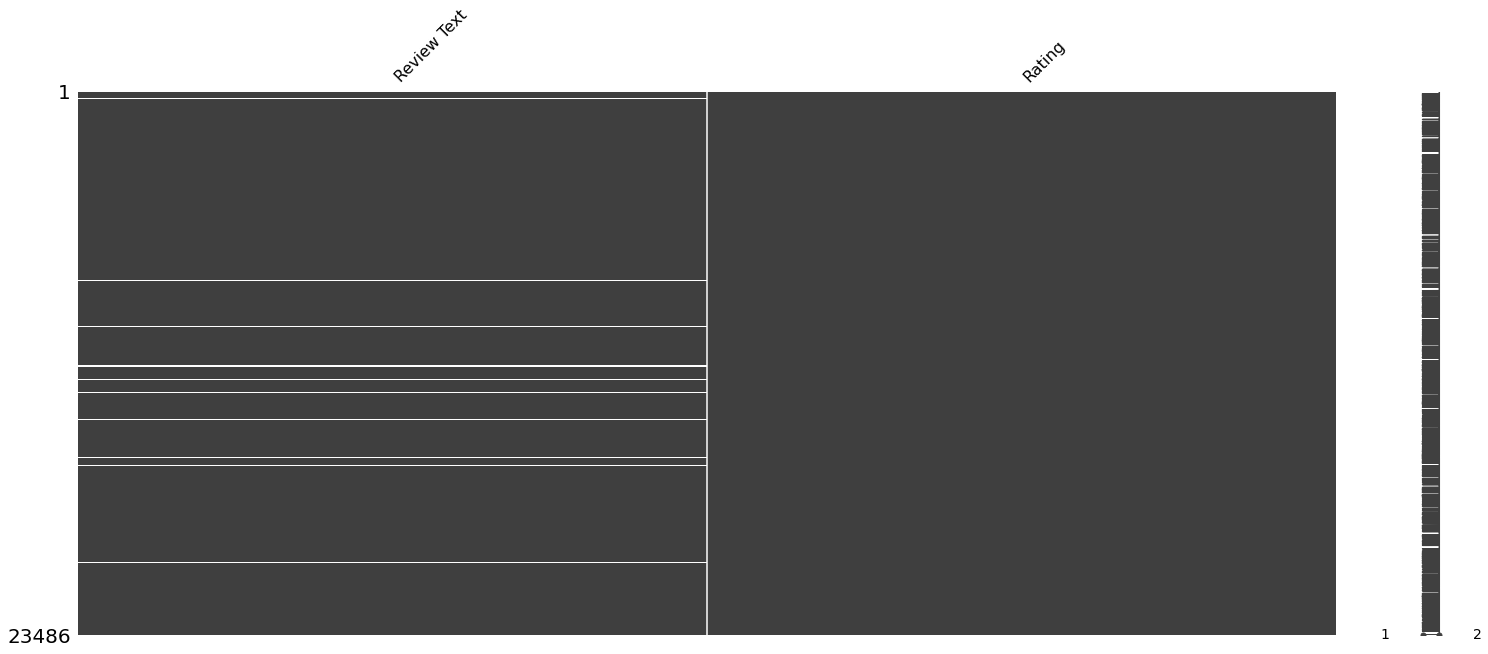

In [179]:
'''
---------------------------------------------------------------------------------------------------------------------
We see that there is an uneven amount of non-null values between the columns, this could be due to an error for 
a certain amount of time, or the reviews let the person rate without leaving a review.
We can use a library to figure this out.
---------------------------------------------------------------------------------------------------------------------
| pip install missingno | This lbrary is used to visualize the missing values in the dataframe relative to each other.
---------------------------------------------------------------------------------------------------------------------
'''
msno.matrix(reviewsData)


In [180]:
'''
---------------------------------------------------------------------------------------------------------------------
We see that there are only missing values within the review text column, we also see that the nulls are spread out
which would imply that it is not mandatory to leave a review. We may have to keep this in mind later.
Assuming the data is setup in chronological order, If there was a big chunk of missing reviews then it would indicate an
error in the system at a certain point in time.
---------------------------------------------------------------------------------------------------------------------
There are a lot of records to work with and not too many null values, so it's better to just drop the few nulls instead
of try to fix them.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData = reviewsData.dropna()
reviewsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  string
 1   Rating       22641 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 530.6 KB


In [181]:
'''
---------------------------------------------------------------------------------------------------------------------
We see that we roughly lost a bit more than 800 records.
Which isn't too frightening when you consider that we will have 22 thousand left.
---------------------------------------------------------------------------------------------------------------------
There was also something interesting in one of the heading columns.
Let's take a closer look at one specific record.
---------------------------------------------------------------------------------------------------------------------   
'''
print(reviewsData['Review Text'][3])

<b>I love, love, love!</b> this jumpsuit. it's fun, flirty, and fabulous! <u>every time i wear it</u>, i get nothing but great compliments!


In [182]:
'''
---------------------------------------------------------------------------------------------------------------------
We see the presence of html elements, so we can get rid of them quickly.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData['Review Text'] = reviewsData['Review Text'].str.replace('<.*?>', '')
print(reviewsData['Review Text'][3])

I love, love, love! this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\160984542.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\160984542.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
'''
---------------------------------------------------------------------------------------------------------------------
Next we can remove any punctuations from the strings to make it easier to work with.
This is because the bag of words model doesn't care about punctuations or the order of words.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData['Review Text'] = reviewsData['Review Text'].str.replace('[^\w\s]','')
print(reviewsData['Review Text'][3])

C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\548571036.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



I love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments


C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\548571036.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
'''
---------------------------------------------------------------------------------------------------------------------
After that we can make sure that all the text is in lower case.
This is to keep is all consistent and make it easier for the model to work with.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData['Review Text'] = reviewsData['Review Text'].str.lower()
print(reviewsData['Review Text'][3])

i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments


C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\1210429010.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
'''
---------------------------------------------------------------------------------------------------------------------
Next we get rid of stopwords, which are words that are not important to the meaning of the text.
---------------------------------------------------------------------------------------------------------------------
Let's take a look at some of the words which will be removed from the text.
---------------------------------------------------------------------------------------------------------------------
'''

stop = stopwords.words('english')
stop


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [186]:
'''
---------------------------------------------------------------------------------------------------------------------
Let's remove these words from the dataframe.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData['Review Text'] = reviewsData['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(reviewsData['Review Text'][3])

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments


C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\3423199248.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
'''
---------------------------------------------------------------------------------------------------------------------
The next step is to inspect the ratings column. Let's check how many unique categories there are to make sure there
aren't any mistakes.
---------------------------------------------------------------------------------------------------------------------
'''
reviewsData['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [188]:
'''
---------------------------------------------------------------------------------------------------------------------
Lucky for us there seem to be only 5 unique categories, which is what we expected and hoped for.
We can go even further to see the frequency of these categories.
---------------------------------------------------------------------------------------------------------------------
We can visualise this with plotly and a histogram.
---------------------------------------------------------------------------------------------------------------------
'''
import plotly.express as px
fig=px.histogram(reviewsData,
                 x="Rating",
                 color="Rating",      
                 hover_data=reviewsData.columns,
                 title="Frequency of ratings",
                 barmode="stack")
fig.show()

In [189]:
'''
---------------------------------------------------------------------------------------------------------------------
We see that the clothing store often gets good ratings and much fewer bad ratings.
But there is a catch here.
We want to take the scores and convert them into binary, 1 and 0s for positive and negative ratings.
So we can easily convert the 4 and 5 star ratings into positive ratings with a 1.
And then take the 1 and 2 star ratings and convert them into negative ratings with a 0.
---------------------------------------------------------------------------------------------------------------------
But what about the 3 star ratings.
---------------------------------------------------------------------------------------------------------------------
We are going to take the 3 star ratings as negative ratings.
When testing the model and exluding the 3 star ratings, we saw that the recall was extrememly low (40%) for the negative reviews.
Due to them being too few of them.
SMOTE makes the recall even worse.
So to increase the amount of values we will take 3 star reviews as negative.
---------------------------------------------------------------------------------------------------------------------
'''
#reviewsData = reviewsData[reviewsData['Rating'] != 3] 
print(reviewsData['Rating'].unique())
print(reviewsData['Rating'].describe())


[4 5 3 2 1]
count    22641.000000
mean         4.183561
std          1.115762
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [190]:
'''
---------------------------------------------------------------------------------------------------------------------
Now we can covert the ratings into binary ratings.
We convert the 4 and 5 star ratings into positive ratings with a 1.
And then take the 1 and 2 star ratings and convert them into negative ratings with a 0.
---------------------------------------------------------------------------------------------------------------------
'''
def sentiment_rating(rating):
    # Replacing ratings of 4,5 with 1 (good) and 1,2 with 0 (not good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating)==3):
        return 0
    else: 
        return 1

reviewsData['Rating'] = reviewsData['Rating'].apply(sentiment_rating) 
reviewsData

C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\908247132.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Review Text  Rating
0            absolutely wonderful silky sexy comfortable       1
1      love dress sooo pretty happened find store im ...       1
2      high hopes dress really wanted work initially ...       0
3      love love love jumpsuit fun flirty fabulous ev...       1
4      shirt flattering due adjustable front tie perf...       1
...                                                  ...     ...
23481  happy snag dress great price easy slip flatter...       1
23482  reminds maternity clothes soft stretchy shiny ...       0
23483  fit well top see never would worked im glad ab...       0
23484  bought dress wedding summer cute unfortunately...       0
23485  dress lovely platinum feminine fits perfectly ...       1

[22641 rows x 2 columns]

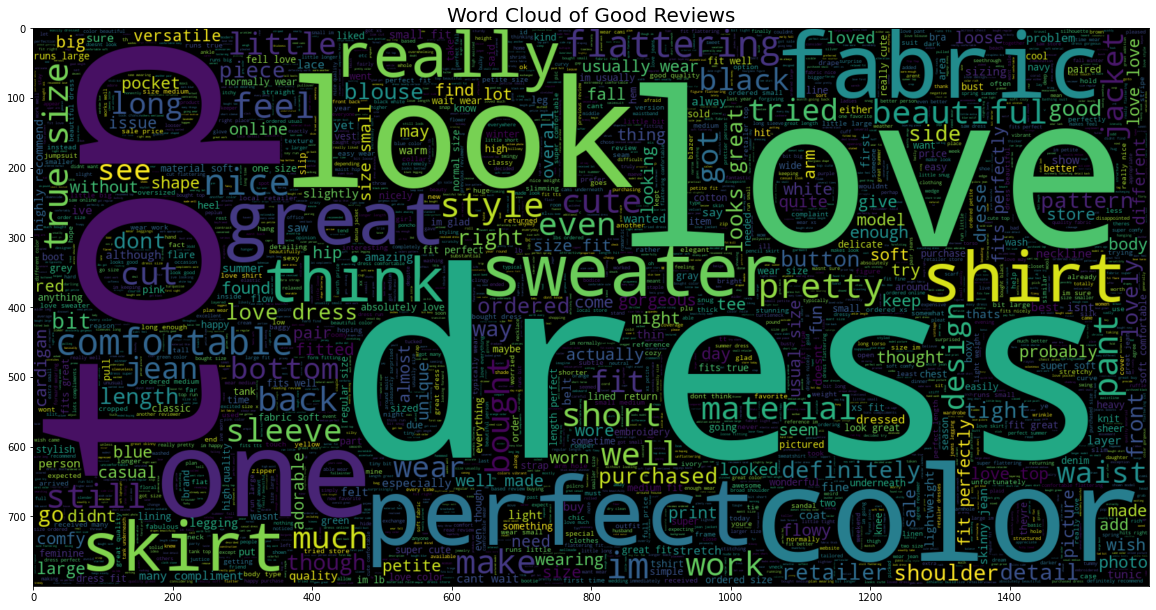

In [191]:
'''
---------------------------------------------------------------------------------------------------------------------
We can now start visualizing which words appear in the negative and positive reviews respectively.
To do this we can use a wordcloud.
---------------------------------------------------------------------------------------------------------------------
The first step is to split the data into good and bad reviews.
---------------------------------------------------------------------------------------------------------------------
'''
GoodReviews = reviewsData[reviewsData['Rating'] == 1]
BadReviews = reviewsData[reviewsData['Rating'] == 0]
'''
---------------------------------------------------------------------------------------------------------------------
Now we can display the wordcloud for the good reviews.
---------------------------------------------------------------------------------------------------------------------
We send a list of english stopwords to exclude certain words which hold no value, such as 'I' or 'The'.
---------------------------------------------------------------------------------------------------------------------
'''


plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(GoodReviews['Review Text']))
plt.title("Word Cloud of Good Reviews", fontsize = 20)
plt.imshow(wc,interpolation = 'bilinear')

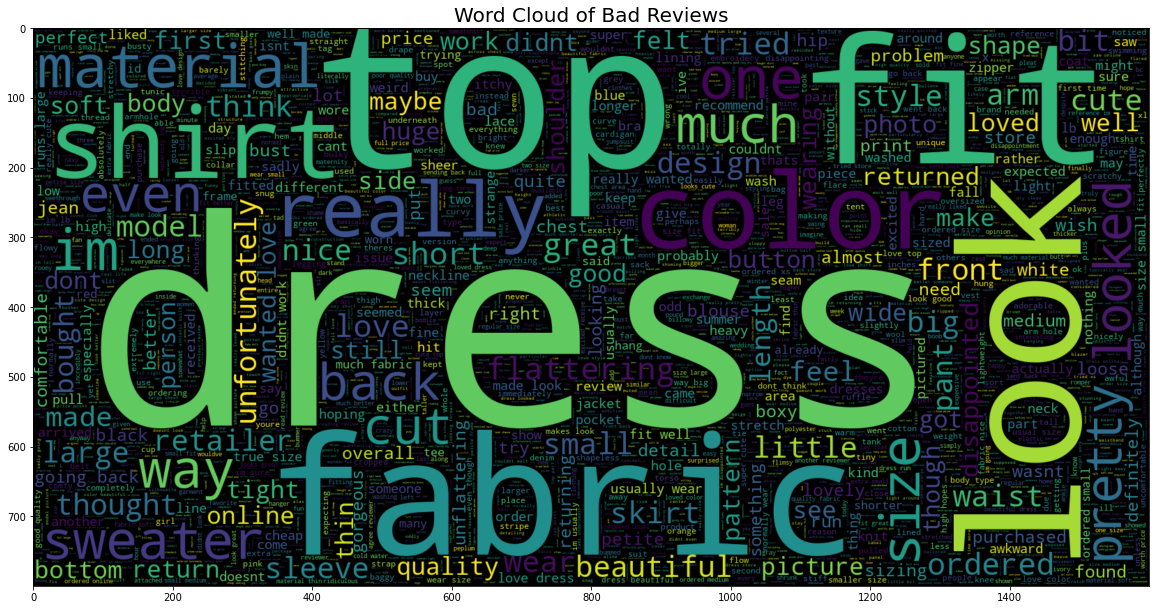

In [192]:
'''
---------------------------------------------------------------------------------------------------------------------
We see some predictable words such as 'love', 'great' and 'perfect'.
But also some interesting words such as 'dress' and 'top'.
---------------------------------------------------------------------------------------------------------------------
Let's look at the wordcloud for the bad reviews.
---------------------------------------------------------------------------------------------------------------------
'''
plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(BadReviews['Review Text']))
plt.title("Word Cloud of Bad Reviews", fontsize = 20)
plt.imshow(wc,interpolation = 'bilinear')

In [193]:
'''
---------------------------------------------------------------------------------------------------------------------
The wordcloud for the bad reviews shows something quite interesting.
We see a lot more words like 'fabric' and 'material'(Which show up in the good reviews but is slightly more prominent here).
---------------------------------------------------------------------------------------------------------------------
Now we can start looking towards tokenization
---------------------------------------------------------------------------------------------------------------------
Tokenisation is the process of breaking a text into smaller chunks.
Like breaking a sentence into smaller words and then counting them.
Let's take a record as an example and see how tokenisation works.
---------------------------------------------------------------------------------------------------------------------
'''
from nltk.tokenize import word_tokenize
text = reviewsData['Review Text'][3]
words = word_tokenize(text)
print(words)

['love', 'love', 'love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'every', 'time', 'wear', 'get', 'nothing', 'great', 'compliments']


In [194]:
'''
---------------------------------------------------------------------------------------------------------------------
Here is a good place to demonstrate the bag of words model, where we can see how many times each word appears in the text.
---------------------------------------------------------------------------------------------------------------------
'''
words = CountVectorizer().fit(reviewsData['Review Text'][3:4])
words.vocabulary_

{'love': 8,
 'jumpsuit': 7,
 'fun': 4,
 'flirty': 3,
 'fabulous': 2,
 'every': 1,
 'time': 10,
 'wear': 11,
 'get': 5,
 'nothing': 9,
 'great': 6,
 'compliments': 0}

In [195]:
'''
---------------------------------------------------------------------------------------------------------------------
We see below that the result of the TfidVectorizer is the same as the bag of words model. But the method behind it is 
different which might result in a different output.
---------------------------------------------------------------------------------------------------------------------
'''
words = TfidfVectorizer(use_idf=True).fit(reviewsData['Review Text'][3:4])
words.vocabulary_
#display a matrix
words


TfidfVectorizer()

<img src="Images/Section2.png" width="1500" height = "300">

In [196]:
'''
---------------------------------------------------------------------------------------------------------------------
There are quite a few ways to go about creating this model.

We can use stemming, which is the process of reducing a word to its root form.
We can use lemmatization, which is the process of reducing a word to its lemma form.

We can use both stemming and lemmatization.

We can use the bag of words model, which is a model that uses the frequency of words in a text.
Or we can use the tfidf model, which is a model that uses the frequency of words in a text and the inverse document frequency.
---------------------------------------------------------------------------------------------------------------------
The first step is to split the data into and X variable and a Y variable.
The X varaible will hold the review text.
While the y variable will hold the sentiment.
---------------------------------------------------------------------------------------------------------------------
'''
from collections import Counter

X = reviewsData['Review Text']
y = reviewsData['Rating']

In [197]:
'''
---------------------------------------------------------------------------------------------------------------------
We see that there are 17448 positive reviews and 2370 negative reviews.
---------------------------------------------------------------------------------------------------------------------
Let's now split the data into training and testing data.
80% training and 20% testing.
The testing data will only be used to test the model at the end of the proces.
---------------------------------------------------------------------------------------------------------------------
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2) 

In [198]:
'''
---------------------------------------------------------------------------------------------------------------------
Now we can start looking at how pipelines are created.
---------------------------------------------------------------------------------------------------------------------
The pipeline passes the data from one to the other and so on.
We will use this concept to make our lives much easier by applying stemming, lemmatization, Tfid and the bag of words model
to these pipelines, to see which combination has the best outcomes.
---------------------------------------------------------------------------------------------------------------------
First let's look at how the pipeline behaves in terms of stemming, which shortings words to their root forms.
The below code are classes which can be used in the pipeline processes.
---------------------------------------------------------------------------------------------------------------------
'''

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text): #Lemmatize the words
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

class StemTheWords(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split()))
    
class Lemmatize(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.apply(lemmatize_words)
    
class outputX(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        print(X)
        return X

In [199]:
'''
---------------------------------------------------------------------------------------------------------------------
Now let's create a basic pipeline to demonstrate how they work with stemming.
The outputX method will print out the X_train variable when it is run.
So let's output it first, before the stemming process.
---------------------------------------------------------------------------------------------------------------------
.fit will call the fit method within the class.
.transform will call the transform method within the class.
.transform_fit will call both.
---------------------------------------------------------------------------------------------------------------------
'''

Test_PipeLine = make_pipeline(outputX(),StemTheWords())
Test_PipeLine.fit(X_train)

14263    bought shirt midjuly washed twice cold delicat...
10630    paigepilcro lover years mcguire jeans went sal...
2936     runs almost two sizes small plan wear jacket s...
13380    gorgeous pattern even prettier person runs sli...
6231     love top tried store loved great transitional ...
                               ...                        
1144     wanted casual denim colored skirt warmer weath...
19596    great summer staple tank first ordered black w...
12236    bathing suit cute fits great im 510 130 ordere...
6877     love dress favorite retailer purchase years pe...
2665     would perfect except ridiculous attached scarf...
Name: Review Text, Length: 18112, dtype: object


Pipeline(steps=[('outputx', outputX()), ('stemthewords', StemTheWords())])

In [200]:
'''
---------------------------------------------------------------------------------------------------------------------
Now let's see what happens when we display the test after the stemming process in the pipeline.
We add an extra step to make sure it actually prints out the set, which is won't if it's the last class in the pipeline.
---------------------------------------------------------------------------------------------------------------------
'''
Test_PipeLine = make_pipeline(StemTheWords(),outputX(),CountVectorizer())
Test_PipeLine.fit(X_train)

14263    bought shirt midjuli wash twice cold delic hun...
10630    paigepilcro lover year mcguir jean went sale l...
2936     run almost two size small plan wear jacket sle...
13380    gorgeou pattern even prettier person run sligh...
6231     love top tri store love great transit piec ric...
                               ...                        
1144     want casual denim color skirt warmer weather w...
19596    great summer stapl tank first order black whit...
12236    bath suit cute fit great im 510 130 order medi...
6877     love dress favorit retail purchas year perfect...
2665     would perfect except ridicul attach scarf mate...
Name: Review Text, Length: 18112, dtype: object


Pipeline(steps=[('stemthewords', StemTheWords()), ('outputx', outputX()),
                ('countvectorizer', CountVectorizer())])

In [201]:
'''
----------------------------------------------------------------------------------------------------------
We see that it transforms the words into it's root forms.
We also see that words ending in a y have it replaced with an i.
----------------------------------------------------------------------------------------------------------
Next we can look how implenting lemmatization works.
The process takes a very long time, so for the sake of demonstration we will only use the first 10 reviews.
----------------------------------------------------------------------------------------------------------
'''
Test_PipeLine = make_pipeline(outputX(),Lemmatize(),CountVectorizer())
Test_PipeLine.fit(X_train.head(10))

14263    bought shirt midjuly washed twice cold delicat...
10630    paigepilcro lover years mcguire jeans went sal...
2936     runs almost two sizes small plan wear jacket s...
13380    gorgeous pattern even prettier person runs sli...
6231     love top tried store loved great transitional ...
10365    im new mom thrilled structure quality dress gi...
5347     maeve really keeps guessing sizingusually big ...
17837    love tshirt speckled grey looks like roof shin...
475      bought white size 140lbs 58 34b wanted baggy f...
20810    bought extra small although love style unique ...
Name: Review Text, dtype: object


Pipeline(steps=[('outputx', outputX()), ('lemmatize', Lemmatize()),
                ('countvectorizer', CountVectorizer())])

In [202]:
'''
----------------------------------------------------------------------------------------------------------
We see significantly less drastic changes to the words by grouping different variations of the form
into a single word.
----------------------------------------------------------------------------------------------------------
Pay attention to record 1732, the word 'photographers'.
Which is plural, so it will be converted to singular when we run the lemmatization process.
----------------------------------------------------------------------------------------------------------
'''
Test_PipeLine = make_pipeline(Lemmatize(),outputX(),CountVectorizer())
Test_PipeLine.fit(X_train.head(10))

14263    bought shirt midjuly wash twice cold delicate ...
10630    paigepilcro lover year mcguire jean go sale lo...
2936     run almost two size small plan wear jacket sle...
13380    gorgeous pattern even prettier person run slig...
6231     love top try store love great transitional pie...
10365    im new mom thrill structure quality dress give...
5347     maeve really keep guess sizingusually big one ...
17837    love tshirt speckle grey look like roof shingl...
475      bought white size 140lbs 58 34b want baggy fit...
20810    bought extra small although love style unique ...
Name: Review Text, dtype: object


Pipeline(steps=[('lemmatize', Lemmatize()), ('outputx', outputX()),
                ('countvectorizer', CountVectorizer())])

In [203]:
'''
----------------------------------------------------------------------------------------------------------
We can create a scenario to better demonstrate what lemmatization is doing.
It's takes words and groups them together, then turns any afflicted word into the base of that group.
----------------------------------------------------------------------------------------------------------
'''
example = np.array(['corpora','better'])
exampleSeries = pd.Series(example)

class outputExample(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        
        print('Corpora:\t',X.loc[0])
        print('Better:\t\t',X.loc[1])
        return X

Test_PipeLine = make_pipeline(Lemmatize(),outputExample(),CountVectorizer())
Test_PipeLine.fit(exampleSeries)

Corpora:	 corpus
Better:		 well


Pipeline(steps=[('lemmatize', Lemmatize()), ('outputexample', outputExample()),
                ('countvectorizer', CountVectorizer())])

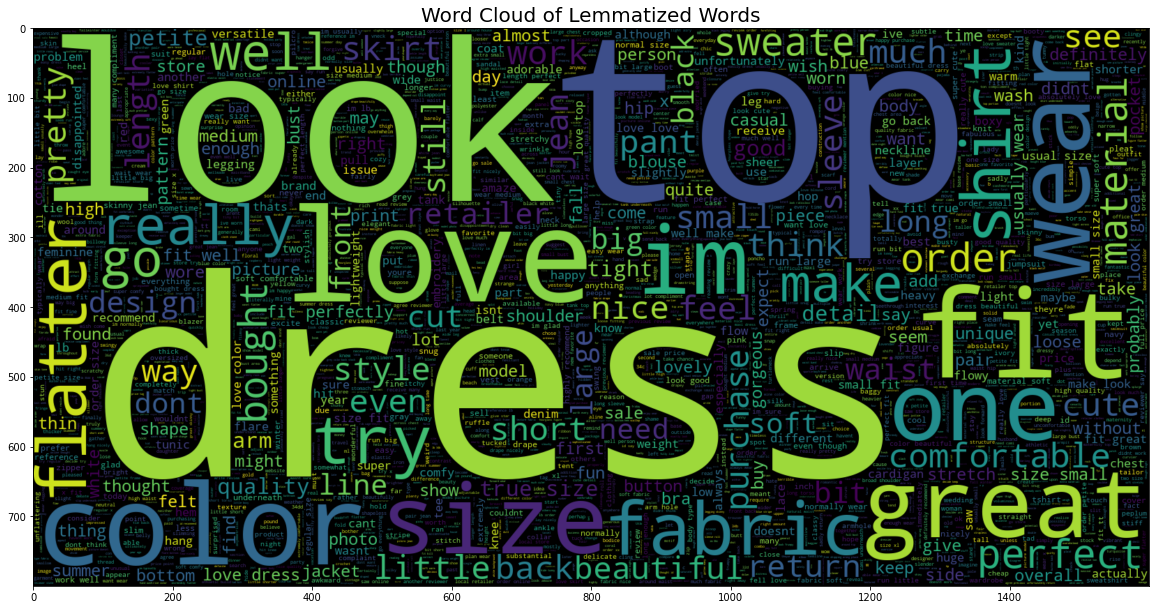

In [204]:
'''
----------------------------------------------------------------------------------------------------------
It has proven that you can lemmatize code and then use it within a pipeline.
But it takes a very long time to do it.
----------------------------------------------------------------------------------------------------------
In the final model we will lemmatize any output.
But for the time being we will simply lemmatize the full dataframe, and then store it in pre-lemmatized variables.
This is so we only have to run it once. And not everytime we want to try testing the model.
----------------------------------------------------------------------------------------------------------
'''
X_test_lem = X_test.apply(lemmatize_words)
X_train_lem = X_train.apply(lemmatize_words)

plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(X_test_lem))
plt.title("Word Cloud of Lemmatized Words", fontsize = 20)
plt.imshow(wc,interpolation = 'bilinear')

In [205]:
'''
----------------------------------------------------------------------------------------------------------
The below method will take a model and create pipelines of different variations of the model.
And the display the accuracy of those different variations.
----------------------------------------------------------------------------------------------------------
'''
def getAccuracyReport(model,X_train,y_train,X_test,y_test,X_train_lem,X_test_lem,fullReport):
    if fullReport == True:
        #No stemming or lemmatization
        NB_PipeLine_Standard = make_pipeline(CountVectorizer(),model)
        NB_PipeLine_Standard.fit(X_train,y_train)
        NB_BG_Standard_Ouputs = cross_val_score(NB_PipeLine_Standard,X_test,y_test,cv=5)
        averageScore_NB_BG_Standard = np.mean(NB_BG_Standard_Ouputs)

        #Bag of words model with Stemming and Lemmatization
        NB_PipeLine_BG_LEM_STEM = make_pipeline(StemTheWords(),CountVectorizer(),MultinomialNB())
        NB_PipeLine_BG_LEM_STEM.fit(X_train_lem,y_train)
        NB_BG_Lem_Stem_Outputs = cross_val_score(NB_PipeLine_BG_LEM_STEM,X_test_lem,y_test,cv=5)
        averageScore_NB_BG_Lem_Stem = np.mean(NB_BG_Lem_Stem_Outputs)
    
    #Bag of words model with Stemming
    NB_PipeLine_BG_STEM = make_pipeline(StemTheWords(),CountVectorizer(),model)
    NB_PipeLine_BG_STEM.fit(X_train,y_train)
    NB_BG_Stem_Outputs = cross_val_score(NB_PipeLine_BG_STEM,X_test,y_test,cv=5)
    averageScore_NB_BG_Stem = np.mean(NB_BG_Stem_Outputs)

    #Bag of words model with Lemmatization (Remember we will feed the lemmatized data into the model to save time for demonstration)
    #It's important the lemmatize the data before stemming, as the stemmed data will come up as jibberish for the lemmatization process.
    NB_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),model)
    NB_PipeLine_BG_LEM.fit(X_train_lem,y_train)
    NB_BG_Lem_Outputs = cross_val_score(NB_PipeLine_BG_LEM,X_test_lem,y_test,cv=5)
    averageScore_NB_BG_Lem = np.mean(NB_BG_Lem_Outputs)
    
    '''
    ----------------------------------------------------------------------------------------------------------
    Term Frequency - inverse Document Frequency (TF-IDF)
    ----------------------------------------------------------------------------------------------------------
    '''
    if fullReport == True:
        #Tfid with no stemming or lemmatization
        NB_PipeLine_TF_Standard = make_pipeline(TfidfVectorizer(use_idf=True),model)
        NB_PipeLine_TF_Standard.fit(X_train,y_train)
        NB_TF_Standard_Outputs = cross_val_score(NB_PipeLine_TF_Standard,X_test,y_test,cv=5)
        averageScore_NB_TF_Standard = np.mean(NB_TF_Standard_Outputs)
        
        #Tfid with Stemming and Lemmatization
        NB_PipeLine_TF_LEM_STEM = make_pipeline(StemTheWords(),TfidfVectorizer(use_idf=True),model)
        NB_PipeLine_TF_LEM_STEM.fit(X_train_lem,y_train)
        NB_TF_Lem_Stem_Outputs = cross_val_score(NB_PipeLine_TF_LEM_STEM,X_test_lem,y_test,cv=5)
        averageScore_NB_TF_Lem_Stem = np.mean(NB_TF_Lem_Stem_Outputs)
        
    #Term Frequency - inverse Document Frequency (Tfid) model with Stemming
    NB_PipeLine_TF_STEM = make_pipeline(StemTheWords(),TfidfVectorizer(use_idf=True),model)
    NB_PipeLine_TF_STEM.fit(X_train,y_train)
    NB_TF_Stem_Outputs = cross_val_score(NB_PipeLine_TF_STEM,X_test,y_test,cv=5)
    averageScore_NB_TF_Stem = np.mean(NB_TF_Stem_Outputs)

    #TFid with Lemmatization
    NB_PipeLine_TF_LEM = make_pipeline(TfidfVectorizer(use_idf=True),model)
    NB_PipeLine_TF_LEM.fit(X_train_lem,y_train)
    NB_TF_Lem_Outputs = cross_val_score(NB_PipeLine_TF_LEM,X_test_lem,y_test,cv=5)
    averageScore_NB_TF_Lem = np.mean(NB_TF_Lem_Outputs)

    if fullReport == True:
        print(f'''
      ------------------------- BAG OF WORDS MODEL-------------------------
      With no stemming or lemmatization: 
      {NB_BG_Standard_Ouputs} Average : {round(averageScore_NB_BG_Standard,3)}
      
      With Stemming:
      {NB_BG_Stem_Outputs} Average : {round(averageScore_NB_BG_Stem,3)}
           
      With Lemmatization:
      {NB_BG_Lem_Outputs} Average : {round(averageScore_NB_BG_Lem,3)}
        
      With Both Lemmatization and Stemming:
      {NB_BG_Lem_Stem_Outputs} Average : {round(averageScore_NB_BG_Lem_Stem,3)}
      -------------------------- TF-IDF MODEL -------------------------
      With no stemming or lemmatization:
      {NB_TF_Standard_Outputs} Average : {round(averageScore_NB_TF_Standard,3)}
         
      With Stemming:
      {NB_TF_Stem_Outputs} Average : {round(averageScore_NB_TF_Stem,3)}
      
      With Lemmatization:
      {NB_TF_Lem_Outputs} Average : {round(averageScore_NB_TF_Lem,3)}
       
      With Both Lemmatization and Stemming: 
      {NB_TF_Lem_Stem_Outputs} Average : {round(averageScore_NB_TF_Lem_Stem,3)}
      ''')
    else:
        print(f'''
      ------------------------- BAG OF WORDS MODEL-------------------------
    
      With Stemming:
      {NB_BG_Stem_Outputs} Average : {round(averageScore_NB_BG_Stem,3)}
           
      With Lemmatization:
      {NB_BG_Lem_Outputs} Average : {round(averageScore_NB_BG_Lem,3)}
        
      -------------------------- TFID MODEL -------------------------
         
      With Stemming:
      {NB_TF_Stem_Outputs} Average : {round(averageScore_NB_TF_Stem,3)}
      
      With Lemmatization:
      {NB_TF_Lem_Outputs} Average : {round(averageScore_NB_TF_Lem,3)}
       
      ''')
     

<h2>Multinomial Naive Bayes

In [206]:
'''
----------------------------------------------------------------------------------------------------------
Let's compare the different accuacys of the Naive Bayes Multinomial Model.
We use the cross validation technique.
----------------------------------------------------------------------------------------------------------
We aren't going to shuffle the data (  cross_val_score(cv=KFold(shuffle=True))  ) as we want to see how
each instance handles the same data.
----------------------------------------------------------------------------------------------------------
'''
getAccuracyReport(MultinomialNB(), X_train, y_train, X_test, y_test, X_train_lem, X_test_lem, fullReport=True)


      ------------------------- BAG OF WORDS MODEL-------------------------
      With no stemming or lemmatization: 
      [0.86092715 0.84547461 0.84547461 0.85651214 0.85966851] Average : 0.854
      
      With Stemming:
      [0.86092715 0.84216336 0.85209713 0.85651214 0.84861878] Average : 0.852
           
      With Lemmatization:
      [0.85761589 0.84326711 0.84437086 0.85430464 0.85082873] Average : 0.85
        
      With Both Lemmatization and Stemming:
      [0.86313466 0.84216336 0.84878587 0.85651214 0.84861878] Average : 0.852
      -------------------------- TF-IDF MODEL -------------------------
      With no stemming or lemmatization:
      [0.76600442 0.76490066 0.76600442 0.76379691 0.76464088] Average : 0.765
         
      With Stemming:
      [0.76821192 0.76490066 0.76600442 0.76710817 0.7679558 ] Average : 0.767
      
      With Lemmatization:
      [0.76821192 0.76490066 0.76710817 0.76600442 0.76353591] Average : 0.766
       
      With Both Lemmatiza


      ----------------
      Stemming report:
      ----------------
                    precision    recall  f1-score   support

           0       0.74      0.70      0.72      1071
           1       0.91      0.93      0.92      3458

    accuracy                           0.87      4529
   macro avg       0.83      0.81      0.82      4529
weighted avg       0.87      0.87      0.87      4529

      
      ----------------
      Lem Report:
      ----------------
                    precision    recall  f1-score   support

           0       0.74      0.69      0.72      1071
           1       0.91      0.93      0.92      3458

    accuracy                           0.87      4529
   macro avg       0.82      0.81      0.82      4529
weighted avg       0.87      0.87      0.87      4529



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



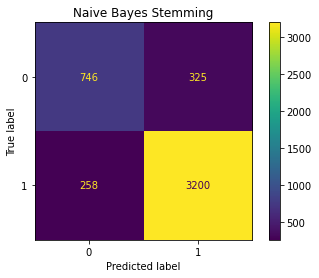

c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



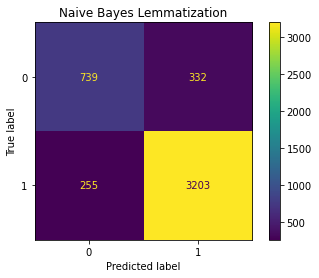

In [207]:
'''
----------------------------------------------------------------------------------------------------------
We notice little difference in the scores of the Bag of words models.
But we notice absolutely no difference in the TFID model.
So the TFID model shows 0 difference in the scores of the models.

This is a bit weird but it's likely due to both, how clean the data is and how the
NB model works.
----------------------------------------------------------------------------------------------------------
Let's look at the confusion matrix and classification scores.
----------------------------------------------------------------------------------------------------------
Stemming outperformed lemmatization so we will use stemming to test.
----------------------------------------------------------------------------------------------------------
Let's create official pipelines and output a confusion matrix and classification report.
----------------------------------------------------------------------------------------------------------
'''
NB_PipeLine_BG_STEM = make_pipeline(StemTheWords(),CountVectorizer(),MultinomialNB())
NB_PipeLine_BG_STEM.fit(X_train,y_train)

NB_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),MultinomialNB())
NB_PipeLine_BG_LEM.fit(X_train_lem,y_train)
      
pred_stem = NB_PipeLine_BG_STEM.predict(X_test)
pred_lem = NB_PipeLine_BG_LEM.predict(X_test_lem)

print(f'''
      ----------------
      Stemming report:
      ----------------
      {classification_report(y_test, pred_stem)}
      
      ----------------
      Lem Report:
      ----------------
      {classification_report(y_test, pred_lem)}'''
      )
      
plot_confusion_matrix(NB_PipeLine_BG_STEM, X_test, y_test)
plt.grid(False)
plt.title('Naive Bayes Stemming')
plt.show()

plot_confusion_matrix(NB_PipeLine_BG_LEM, X_test_lem, y_test)
plt.grid(False)
plt.title('Naive Bayes Lemmatization')
plt.show()

In [208]:
'''
----------------------------------------------------------------------------------------------------------
We see little to no difference between lemmatization and stemming.
----------------------------------------------------------------------------------------------------------
We also see that the accuracy score is basically a lie.
It's bad at predicting negative reviews.
There is just such a large amount of positive reviews that if it just guesses positive each time then it 
will get a good score.
----------------------------------------------------------------------------------------------------------
This is likely due to there not being enough negative data to train the model.
Let's try using SMOTE to generate some fake negative reviews.
----------------------------------------------------------------------------------------------------------
'''
print(f'Original shape : {Counter(y_train)}')
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2)) #Create the vecotirizer
X_train_Vectorised = tfidf_vectorizer.fit_transform(X_train) #Transform the data
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train_Vectorised, y_train) #Smote the data
print(f'Resampled dataset shape {Counter(y_res)}')

Original shape : Counter({1: 13990, 0: 4122})
Resampled dataset shape Counter({0: 13990, 1: 13990})


In [209]:
'''
----------------------------------------------------------------------------------------------------------
The SMOTE generated some new negative records for us. So now we can test the model with these new records.
----------------------------------------------------------------------------------------------------------
'''
NB_PipeLine_TF_Standard_SMOTE = make_pipeline(MultinomialNB()) #Create a new pipeline
NB_PipeLine_TF_Standard_SMOTE.fit(X_res,y_res) #Fit the new data
X_test_vect_stem = tfidf_vectorizer.fit_transform(X_test) #Transform the test data
X_test_vect_lem = tfidf_vectorizer.fit_transform(X_test_lem) #Transform the test data

NB_y_pred_stem = NB_PipeLine_TF_Standard_SMOTE.predict(X_test_vect_stem) #Predict the test data
NB_y_pred_lem = NB_PipeLine_TF_Standard_SMOTE.predict(X_test_vect_lem) #Predict the test data
print(f'''
      -----------
      Stemming:
      -----------
      {classification_report(y_test, NB_y_pred_stem)}
      
      -----------
      Lem Report:
      -----------
      {classification_report(y_test, NB_y_pred_lem)}
      ''')


      -----------
      Stemming:
      -----------
                    precision    recall  f1-score   support

           0       0.32      0.44      0.37      1071
           1       0.80      0.71      0.75      3458

    accuracy                           0.64      4529
   macro avg       0.56      0.57      0.56      4529
weighted avg       0.69      0.64      0.66      4529

      
      -----------
      Lem Report:
      -----------
                    precision    recall  f1-score   support

           0       0.31      0.44      0.36      1071
           1       0.80      0.69      0.74      3458

    accuracy                           0.63      4529
   macro avg       0.55      0.57      0.55      4529
weighted avg       0.68      0.63      0.65      4529

      


In [210]:
'''
----------------------------------------------------------------------------------------------------------
We see that the model is performing significantly worse after intoducing SMOTE to the model.
So we will avoid the smote method for now.
----------------------------------------------------------------------------------------------------------
Let's try using Logistic Regression.
----------------------------------------------------------------------------------------------------------
'''
print('End of Naive Bayes')

End of Naive Bayes


<h2>Logistic Regression

In [211]:
'''
----------------------------------------------------------------------------------------------------------
Let's check the accuracy scores of the Logistic regression model.
----------------------------------------------------------------------------------------------------------
'''
getAccuracyReport(LogisticRegression(solver='lbfgs',max_iter=1000),X_train,y_train,X_test,y_test,X_train_lem,X_test_lem,fullReport=False)


      ------------------------- BAG OF WORDS MODEL-------------------------
    
      With Stemming:
      [0.83774834 0.83774834 0.84437086 0.85651214 0.83977901] Average : 0.843
           
      With Lemmatization:
      [0.83554084 0.84437086 0.8410596  0.85099338 0.84309392] Average : 0.843
        
      -------------------------- TFID MODEL -------------------------
         
      With Stemming:
      [0.85430464 0.83554084 0.82891832 0.84657837 0.84198895] Average : 0.841
      
      With Lemmatization:
      [0.84657837 0.83554084 0.8410596  0.8410596  0.83646409] Average : 0.84
       
      



      ----------------
      Stemming report:
      ----------------
                    precision    recall  f1-score   support

           0       0.73      0.67      0.70      1071
           1       0.90      0.93      0.91      3458

    accuracy                           0.86      4529
   macro avg       0.82      0.80      0.81      4529
weighted avg       0.86      0.86      0.86      4529

      
      ----------------
      Lem Report:
      ----------------
                    precision    recall  f1-score   support

           0       0.73      0.66      0.70      1071
           1       0.90      0.93      0.91      3458

    accuracy                           0.86      4529
   macro avg       0.82      0.79      0.80      4529
weighted avg       0.86      0.86      0.86      4529



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



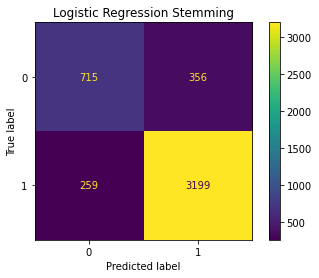

c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



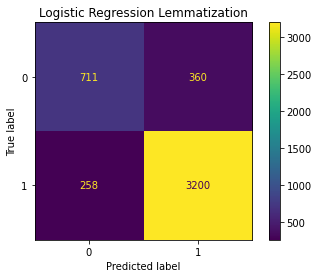

In [212]:
'''
----------------------------------------------------------------------------------------------------------
So far it looks like it's performing pretty consistently.
----------------------------------------------------------------------------------------------------------
Let's check the classification score and confusion matrix of the Logistic regression model.
----------------------------------------------------------------------------------------------------------
'''
LG_PipeLine_BG_STEM = make_pipeline(StemTheWords(),CountVectorizer(),LogisticRegression(solver='lbfgs',max_iter=1000))
LG_PipeLine_BG_STEM.fit(X_train,y_train)

LG_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),LogisticRegression(solver='lbfgs',max_iter=1000))
LG_PipeLine_BG_LEM.fit(X_train_lem,y_train)

pred_stem = LG_PipeLine_BG_STEM.predict(X_test)
pred_lem = LG_PipeLine_BG_LEM.predict(X_test_lem)

print(f'''
      ----------------
      Stemming report:
      ----------------
      {classification_report(y_test, pred_stem)}
      
      ----------------
      Lem Report:
      ----------------
      {classification_report(y_test, pred_lem)}'''
      )
     
plot_confusion_matrix(LG_PipeLine_BG_STEM, X_test, y_test)
plt.grid(False)
plt.title('Logistic Regression Stemming')
plt.show()

plot_confusion_matrix(LG_PipeLine_BG_LEM, X_test_lem, y_test)
plt.grid(False)
plt.title('Logistic Regression Lemmatization')
plt.show()

In [213]:
'''
----------------------------------------------------------------------------------------------------------
We see that the Logistic regression model is performing either on par or slightly worse than the Naive Bayes
----------------------------------------------------------------------------------------------------------
Let's try the Random Forest regression
----------------------------------------------------------------------------------------------------------
'''
print('End of logistic regression')

End of logistic regression


<h2> Random Forest Classification

In [214]:
'''
----------------------------------------------------------------------------------------------------------
Let's get the cross val scores of the Random Forest regression model.
----------------------------------------------------------------------------------------------------------
'''
getAccuracyReport(RandomForestClassifier(),X_train,y_train,X_test,y_test,X_train_lem,X_test_lem,fullReport=False)


      ------------------------- BAG OF WORDS MODEL-------------------------
    
      With Stemming:
      [0.82781457 0.81677704 0.80905077 0.83222958 0.81436464] Average : 0.82
           
      With Lemmatization:
      [0.82671082 0.81346578 0.82450331 0.83443709 0.8121547 ] Average : 0.822
        
      -------------------------- TFID MODEL -------------------------
         
      With Stemming:
      [0.81346578 0.80684327 0.82339956 0.83002208 0.82099448] Average : 0.819
      
      With Lemmatization:
      [0.82450331 0.81788079 0.82229581 0.81567329 0.81325967] Average : 0.819
       
      



      ----------------
      Stemming report:
      ----------------
                    precision    recall  f1-score   support

           0       0.86      0.34      0.49      1071
           1       0.83      0.98      0.90      3458

    accuracy                           0.83      4529
   macro avg       0.85      0.66      0.69      4529
weighted avg       0.84      0.83      0.80      4529

      
      ----------------
      Lem Report:
      ----------------
                    precision    recall  f1-score   support

           0       0.89      0.32      0.48      1071
           1       0.83      0.99      0.90      3458

    accuracy                           0.83      4529
   macro avg       0.86      0.66      0.69      4529
weighted avg       0.84      0.83      0.80      4529



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



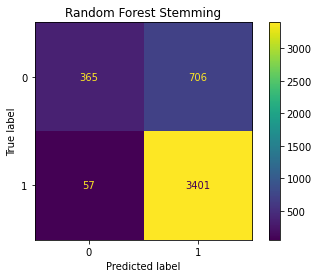

c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



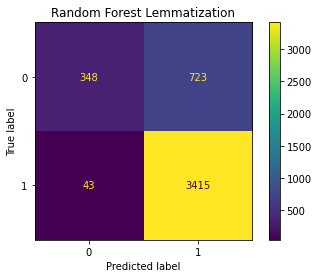

In [215]:
'''
----------------------------------------------------------------------------------------------------------
It's performing a tiny bit worse than the others, but is still quite consistent.
----------------------------------------------------------------------------------------------------------
'''
RF_PipeLine_BG_STEM = make_pipeline(StemTheWords(),CountVectorizer(),RandomForestClassifier())
RF_PipeLine_BG_STEM.fit(X_train,y_train)

RF_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),RandomForestClassifier())
RF_PipeLine_BG_LEM.fit(X_train_lem,y_train)
      
pred_stem = RF_PipeLine_BG_STEM.predict(X_test)
pred_lem = RF_PipeLine_BG_LEM.predict(X_test_lem)

print(f'''
      ----------------
      Stemming report:
      ----------------
      {classification_report(y_test, pred_stem)}
      
      ----------------
      Lem Report:
      ----------------
      {classification_report(y_test, pred_lem)}'''
      )
     
plot_confusion_matrix(RF_PipeLine_BG_STEM, X_test, y_test)
plt.grid(False)
plt.title('Random Forest Stemming')
plt.show()

plot_confusion_matrix(RF_PipeLine_BG_LEM, X_test_lem, y_test)
plt.grid(False)
plt.title('Random Forest Lemmatization')
plt.show()

In [216]:
'''
----------------------------------------------------------------------------------------------------------
The random forest method seems to be quite pathetic at recalling negative reviews.
----------------------------------------------------------------------------------------------------------
Let's lastly try a Linear support vector machine.
----------------------------------------------------------------------------------------------------------
'''
print('End of Random Forest')

End of Random Forest


<h2>Linear Support Vector Machines


In [217]:
'''
----------------------------------------------------------------------------------------------------------
We get the accuracy and cross validation scores of the Linear SVM model.
----------------------------------------------------------------------------------------------------------
'''
getAccuracyReport(svm.LinearSVC(max_iter=3000),X_train,y_train,X_test,y_test,X_train_lem,X_test_lem,fullReport=False)



      ------------------------- BAG OF WORDS MODEL-------------------------
    
      With Stemming:
      [0.81125828 0.81456954 0.83002208 0.83222958 0.83756906] Average : 0.825
           
      With Lemmatization:
      [0.81015453 0.81677704 0.82671082 0.83112583 0.83756906] Average : 0.824
        
      -------------------------- TFID MODEL -------------------------
         
      With Stemming:
      [0.84878587 0.83664459 0.84437086 0.85099338 0.83977901] Average : 0.844
      
      With Lemmatization:
      [0.84326711 0.85320088 0.84216336 0.85761589 0.84530387] Average : 0.848
       
      



      ----------------
      Stemming report:
      ----------------
                    precision    recall  f1-score   support

           0       0.68      0.67      0.68      1071
           1       0.90      0.90      0.90      3458

    accuracy                           0.85      4529
   macro avg       0.79      0.79      0.79      4529
weighted avg       0.85      0.85      0.85      4529

      
      ----------------
      Lem Report:
      ----------------
                    precision    recall  f1-score   support

           0       0.67      0.66      0.67      1071
           1       0.90      0.90      0.90      3458

    accuracy                           0.84      4529
   macro avg       0.79      0.78      0.78      4529
weighted avg       0.84      0.84      0.84      4529



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



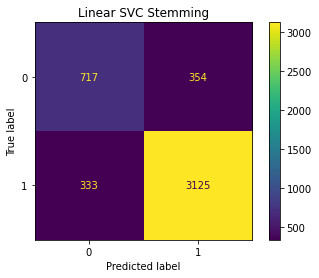

c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



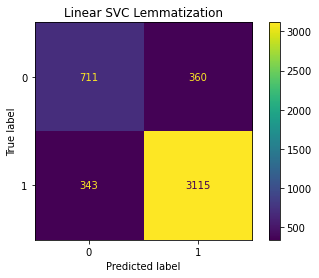

In [218]:
'''
----------------------------------------------------------------------------------------------------------
The scores are consistent.
----------------------------------------------------------------------------------------------------------
'''
LSVC_PipeLine_BG_STEM = make_pipeline(StemTheWords(),CountVectorizer(),svm.LinearSVC(max_iter=3000))
LSVC_PipeLine_BG_STEM.fit(X_train,y_train)

LSVC_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),svm.LinearSVC(max_iter=3000))
LSVC_PipeLine_BG_LEM.fit(X_train_lem,y_train)

pred_stem = LSVC_PipeLine_BG_STEM.predict(X_test)
pred_lem = LSVC_PipeLine_BG_LEM.predict(X_test_lem)

print(f'''
      ----------------
      Stemming report:
      ----------------
      {classification_report(y_test, pred_stem)}
      
      ----------------
      Lem Report:
      ----------------
      {classification_report(y_test, pred_lem)}'''
      )
     
plot_confusion_matrix(LSVC_PipeLine_BG_STEM, X_test, y_test)
plt.grid(False)
plt.title('Linear SVC Stemming')
plt.show()

plot_confusion_matrix(LSVC_PipeLine_BG_LEM, X_test_lem, y_test)
plt.grid(False)
plt.title('Linear SVC Lemmatization')
plt.show()

In [219]:
'''
----------------------------------------------------------------------------------------------------------
So far the Naive Bayes and Logistic regression model are the best performing models.
But with some tuning the other models may be able to perform quite well.
----------------------------------------------------------------------------------------------------------
As for if we should use stemming or lemmatization.
For this data set it didn't seem to matter.
However, in production the input might not be as consistent, with people constantly using words the model has
never seen before.
So for that reason, lemmatization is a better option.
----------------------------------------------------------------------------------------------------------
'''
print('End of Linear SVC')

End of Linear SVC


<img src="Images/Section3.png" width="1500" height = "300">

In [220]:
'''
----------------------------------------------------------------------------------------------------------
Let's introduce hyper parameters.
Where we will loop through multiple parameters until we find the ones which best fit the data.
----------------------------------------------------------------------------------------------------------
Let's demonstrate it with logistic regression quickly.
----------------------------------------------------------------------------------------------------------
The grid will loop through all the parameters you supply it and find the best fit.
----------------------------------------------------------------------------------------------------------
'''

#Hyper parameter tuning for logistic regression
param_grid_logistic_regression = [{
    'C': [0.1,1,10,100,1000], #Inverse of regularization strength
    'max_iter': [1000,2000,3000,4000,5000] #Maximum number of iterations
    }]

LG_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_logistic_regression, cv = 5, n_jobs = 4, verbose = 2)
X_temp = CountVectorizer().fit_transform(X_train)
LG_grid.fit(X_temp, y_train)
bestParams = LG_grid.best_params_
print(f'''
      The Best Parameters for Logistic Regression are:
      
        C = {bestParams['C']}
        max_iter = {bestParams['max_iter']}''')  

Fitting 5 folds for each of 25 candidates, totalling 125 fits

      The Best Parameters for Logistic Regression are:
      
        C = 0.1
        max_iter = 1000


In [221]:

#hyper parameters for MultinomialNB
param_grid_NB = [{
    'alpha': [0,1.0]
    }]

#hyper parameters for Random Forest
param_grid_random_forest = [{'n_estimators': [10,20,30,40,50,60,70,80,90,100], #Number of trees in the forest
                            'max_depth': [2,4] #Maximum depth of the tree                                                       
                            }]

#Hyper parameters for linear support vector machine
param_grid_LSVC = [{'C': [0.1,1,10,100,1000], #Inverse of regularization strength
                    'max_iter': [1000,2000,3000,4000,5000]}] #Maximum number of iterations
                    

In [222]:
'''
----------------------------------------------------------------------------------------------------------
NAIVE BAYES WITH HYPER PARAMETERS.
----------------------------------------------------------------------------------------------------------
'''
NB_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),GridSearchCV(MultinomialNB(),param_grid_NB,cv=5,n_jobs=-1))
pred = NB_PipeLine_BG_LEM.fit(X_train_lem,y_train).predict(X_test_lem)
#print classification report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1071
           1       0.91      0.93      0.92      3458

    accuracy                           0.87      4529
   macro avg       0.82      0.81      0.82      4529
weighted avg       0.87      0.87      0.87      4529



In [223]:
'''
----------------------------------------------------------------------------------------------------------
LOGISTIC REGRESSION WITH HYPER PARAMETERS
----------------------------------------------------------------------------------------------------------
'''
LG_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),GridSearchCV(LogisticRegression(),param_grid_logistic_regression,cv=5,n_jobs=-1))
pred = LG_PipeLine_BG_LEM.fit(X_train_lem,y_train).predict(X_test_lem)
#print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1071
           1       0.89      0.94      0.91      3458

    accuracy                           0.87      4529
   macro avg       0.83      0.79      0.80      4529
weighted avg       0.86      0.87      0.86      4529



In [224]:
'''
----------------------------------------------------------------------------------------------------------
RANDOM FOREST WITH HYPER PARAMETERS.
----------------------------------------------------------------------------------------------------------
'''
RF_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),GridSearchCV(RandomForestClassifier(),param_grid_random_forest,cv=5,n_jobs=-1))
pred = RF_PipeLine_BG_LEM.fit(X_train_lem,y_train).predict(X_test_lem)
#print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1071
           1       0.76      1.00      0.87      3458

    accuracy                           0.76      4529
   macro avg       0.38      0.50      0.43      4529
weighted avg       0.58      0.76      0.66      4529



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [225]:
'''
----------------------------------------------------------------------------------------------------------
We see that the Random forest model is the worst performing model. Completely unable to work with the 
data given and is severely underfit.
----------------------------------------------------------------------------------------------------------
LINEAR SVC WITH HYPER PARAMETERS.
----------------------------------------------------------------------------------------------------------
'''
LSVC_PipeLine_BG_LEM = make_pipeline(CountVectorizer(),GridSearchCV(svm.LinearSVC(),param_grid_LSVC,cv=5,n_jobs=-1))
pred = LSVC_PipeLine_BG_LEM.fit(X_train_lem,y_train).predict(X_test_lem)
#print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.70      1071
           1       0.90      0.92      0.91      3458

    accuracy                           0.86      4529
   macro avg       0.82      0.79      0.80      4529
weighted avg       0.86      0.86      0.86      4529



<img src="Images/Section4.png" width="1500" height = "300">

In [226]:
'''
----------------------------------------------------------------------------------------------------------
The data we used was convienient in the sense that there was text.
And the sentiment with it.
We had the text column and the ratings column.
So we knew if the text was positive or negative.
----------------------------------------------------------------------------------------------------------
But what if we only had text.
We can use the Latent Dirichlet Allocation to get topics from the text.
In this case we want two themes.
Positive and Negative.
----------------------------------------------------------------------------------------------------------
Once we have these groups we can apply the columns accordingly.
----------------------------------------------------------------------------------------------------------
The first thing we do is convert the text to a bag of words.
----------------------------------------------------------------------------------------------------------
'''

cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
matrix = cv.fit_transform(reviewsData['Review Text'])
matrix


<22641x8739 sparse matrix of type '<class 'numpy.int64'>'
	with 523598 stored elements in Compressed Sparse Row format>

In [227]:
'''
----------------------------------------------------------------------------------------------------------
Now that we have our bag of words we fit the LDA model to get some topics.
----------------------------------------------------------------------------------------------------------
We specify two compenents, hopefully to get positive and negatives.
----------------------------------------------------------------------------------------------------------
'''
LDA = LatentDirichletAllocation(n_components=2,random_state=0,max_iter=5)
topics = LDA.fit(matrix)

for i, topic in enumerate(LDA.components_):
    print("Topic %d:" % (i+1))
    print([cv.get_feature_names()[j] for j in topic.argsort()[:-20:-1]])
    print('\n')

Topic 1:
['size', 'dress', 'like', 'fit', 'im', 'small', 'fabric', 'love', 'really', 'ordered', 'little', 'look', 'large', 'color', 'bit', 'petite', 'wear', 'beautiful', 'shirt']


Topic 2:
['love', 'dress', 'wear', 'great', 'fit', 'perfect', 'size', 'color', 'comfortable', 'like', 'jeans', 'im', 'bought', 'cute', 'soft', 'flattering', 'look', 'pants', 'fabric']




c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [228]:
'''
----------------------------------------------------------------------------------------------------------
So now we have the words for our two topics.
So now what happens is that every record can get a weighting based on how likely it is to belong to a topic.
----------------------------------------------------------------------------------------------------------
Let's take the first record.
----------------------------------------------------------------------------------------------------------
'''
topic_results = LDA.transform(matrix)
topic_results[0].round(2)

array([0.11, 0.89])

In [229]:
'''
----------------------------------------------------------------------------------------------------------
We see that the first record is most likely to be in the second topic with a 90% chance.
----------------------------------------------------------------------------------------------------------
We can then assign every record to a topic by taking the highest probablity.
---------------------------------------------------------------------------------------------------------- 
'''
array = topic_results.argmax(axis=1)
df = pd.DataFrame(array.tolist(),columns=['Rating'])
df

Rating
0           1
1           0
2           0
3           1
4           1
...       ...
22636       1
22637       0
22638       0
22639       0
22640       1

[22641 rows x 1 columns]

In [230]:
'''
----------------------------------------------------------------------------------------------------------
We now have a dataframe with the ratings and the topics (Hopefully).
We don't actually know what the topic is.
We can only hope it grouped the positive and negative records together.
----------------------------------------------------------------------------------------------------------
'''
X_LDA = reviewsData['Review Text']
y_LDA = df.to_numpy().flatten()

print(X_LDA.shape)
print(y_LDA.shape)
X_LDA

(22641,)
(22641,)


0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fits perfectly ...
Name: Review Text, Length: 22641, dtype: object

In [231]:
'''
----------------------------------------------------------------------------------------------------------
We take the Review test as the X and the topic as the y.
Then break it into train and test.
----------------------------------------------------------------------------------------------------------
'''
print(f'Samples per class (Train): {np.bincount(y)}')

from sklearn.model_selection import train_test_split
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_LDA, y_LDA, test_size = 0.2, random_state=42) 
vect = CountVectorizer()
X_train_LDA = vect.fit_transform(X_train_LDA)
X_test_LDA = vect.transform(X_test_LDA)

Samples per class (Train): [ 5193 17448]


In [232]:
'''
----------------------------------------------------------------------------------------------------------
Let's check the accuracy
----------------------------------------------------------------------------------------------------------
'''
score = cross_val_score(LogisticRegression(solver='lbfgs',max_iter=1000), X_train_LDA, y_train_LDA, cv=5 )
score

array([0.92216395, 0.9210599 , 0.92517946, 0.92352292, 0.92628382])

In [233]:
'''
----------------------------------------------------------------------------------------------------------
We imediately see that the model is really good at predicting SOMETHING.
----------------------------------------------------------------------------------------------------------
Let's check the classification report.
----------------------------------------------------------------------------------------------------------
'''
model = LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train_LDA,y_train_LDA)
pred = model.predict(X_test_LDA)

print(f'''
      ----------------
      Stemming report:
      ----------------
      {classification_report(y_test_LDA, pred)}
     ''' )


      ----------------
      Stemming report:
      ----------------
                    precision    recall  f1-score   support

           0       0.94      0.94      0.94      2338
           1       0.93      0.93      0.93      2191

    accuracy                           0.94      4529
   macro avg       0.94      0.94      0.94      4529
weighted avg       0.94      0.94      0.94      4529

     


In [234]:
'''
----------------------------------------------------------------------------------------------------------
It's performing very well.
But that just means it has spotted something and is able to identify that something very well.
Let's see if it was actually the sentiment.
----------------------------------------------------------------------------------------------------------
To do this we will compare the correlation between the predicted and the actual sentiment.
----------------------------------------------------------------------------------------------------------
'''
ActualSentiment = pd.Series(reviewsData['Rating'],name='ActualSentiment')
GuessedSentiment = pd.Series(y_LDA,name='GuessedSentiment')
print(ActualSentiment.shape)
print(GuessedSentiment.shape)
print(ActualSentiment.corr(GuessedSentiment))

(22641,)
(22641,)
0.00511696910707505


<img src="Images/Section5.png" width="1500" height = "300">

In [236]:
'''
----------------------------------------------------------------------------------------------------------
We see no real correlation.
So whatever the topic was, it wasn't sentiment.
----------------------------------------------------------------------------------------------------------
Let's use one of the previous models to build a little GUI to play with.
----------------------------------------------------------------------------------------------------------
We will use the Naive Bayes model, with Bag of words and Lemmatization.
As it performed very well very consistently.
----------------------------------------------------------------------------------------------------------
Keep in mind that the Lemmatize method will remove stop words.
----------------------------------------------------------------------------------------------------------
'''

FINAL_NB_PIPE = make_pipeline(Lemmatize(),CountVectorizer(),MultinomialNB())
FINAL_NB_PIPE.fit(X_train,y_train)


Pipeline(steps=[('lemmatize', Lemmatize()),
                ('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [237]:
def sentiment_rating(rating):
    # Replacing ratings of 4,5 with 1 (good) and 1,2 with 0 (not good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating)==3):
        return 0
    else: 
        return 1

class StemTheWords(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split()))
    
class dropTheNullValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.dropna()
    
class getRelevantColumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[['Review Text','Rating']]
    
class returnXAndY(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.iloc[:,0],X.iloc[:,1]
       

class convertYtoBinary(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Rating'] = X['Rating'].apply(sentiment_rating)
        return X
    
class makeItLowerCase(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Review Text'] = X['Review Text'].str.lower()        
        return X
    
class replaceHTMLelements(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Review Text'] = X['Review Text'].str.replace('<.*?>', '')       
        return X

class convertObjectColumnsToStringColumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        string_col = X.select_dtypes(include="object").columns
        X[string_col] = X[string_col].astype("string")
        return X

In [238]:
'''
----------------------------------------------------------------------------------------------------------
Here is a demonstration of the power of pipelines, the vast majority of the analysis process is broken down into a singal input.
----------------------------------------------------------------------------------------------------------
'''

data = pd.read_csv('ClothingReviews.csv')
processingPipeline = make_pipeline(getRelevantColumns(),dropTheNullValues(),convertObjectColumnsToStringColumns(),convertYtoBinary(),replaceHTMLelements(),makeItLowerCase(),returnXAndY())
X,y = processingPipeline.fit_transform(data)
X_train_pipe,X_test_pipe,y_train_pipe,y_test_pipe = train_test_split(X,y,test_size=0.2,random_state=42)

param_grid_NB = [{'alpha': [0,1.0]}]
NB_PipeLine = make_pipeline(StemTheWords(),CountVectorizer(),GridSearchCV(MultinomialNB(),param_grid_NB,cv=5,n_jobs=-1))
NB_PipeLine.fit(X_train,y_train)
print(cross_val_score(NB_PipeLine,X_test_pipe,y_test_pipe,cv=5))


C:\Users\kglez\AppData\Local\Temp\ipykernel_14360\2642173099.py:65: FutureWarning:

The default value of regex will change from True to False in a future version.



[0.85761589 0.85320088 0.88189845 0.87969095 0.86519337]


In [239]:
def predictionSentiment(prediction):
    if prediction == 1:
        print('This is a positive review')
    else:
        print('This is a negative review')
        
text = 'These are the most comfortable shoes I have ever worn. I am very satisfied with the quality of the shoes. I would recommend them to anyone.'

predictionSentiment(NB_PipeLine.predict(pd.Series(text)))

This is a positive review


<img src="Images/Section6.png" width="1500" height = "300">

In [240]:
def predictionSentiment(prediction):
    if prediction == 1:
        print('This is a positive review')
    else:
        print('This is a negative review')
        
text = 'These are the most comfortable shoes I have ever worn. I am very satisfied with the quality of the shoes. I would recommend them to anyone.'

predictionSentiment(FINAL_NB_PIPE.predict(pd.Series(text)))


This is a positive review


In [241]:
text = 'This is a bad product, the shoes are small and the shirt is scratchy. I would not recommend this product to anyone.'
predictionSentiment(FINAL_NB_PIPE.predict(pd.Series(text)))

This is a negative review


In [242]:
from tkinter import *

root = Tk()
root.title('Sentiment Analysis')
root.geometry('500x330')

#Clear textbox
def clear():
    reviewFrame.delete(1.0,END)
    label.config(text='')

#Grab the text from the textboc
def get_text():
    label.config(text=reviewFrame.get(1.0,END))
    text = reviewFrame.get(1.0,END)
    predition = FINAL_NB_PIPE.predict(pd.Series(text))
    if predition[0] == 1:
        label.config(text='This was a positive review')
    else:
        label.config(text='This was a negative review')

label = Label(root, text = "Leave a clothing review")
label.pack(pady=10)

reviewFrame = Text(root, height=10, width=50, font=('Arial', 12))
reviewFrame.pack(pady=10)

label = Label(root,text = '')
label.pack(pady=10)

button_frame = Frame(root)
button_frame.pack()

clear_button = Button(button_frame, text='Clear', command=clear)
clear_button.grid(row=0, column=0)

get_text_button = Button(button_frame, text='Submit Review', command=get_text)
get_text_button.grid(row=0, column=1,padx=20)

root.mainloop()